ALL THE CODE IS LEARNT FROM ANDREJ KARPATHY'S YOUTUBE SERIES [TUNE IN](https://youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&si=HUlTUSiLlpvSXblB)

### DIRECT IMPLEMENTATION --> FIRST ATTEMPT

# MLP with 2 dim embedding, 3 letter block size, 100 neuron hidden layer

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

Mounted at /content/drive


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [ ]:
###

block_size = 3

xs=[]
ys=[]

for word in words:
  context = [0] * block_size
  chs = list(word) + ['.']
  for c in chs:
    idx = stoi[c]
    xs.append(context)
    ys.append(idx)
    # print(''.join(itos[i] for i in context) ,'-->>', itos[idx])
    context = context[1:]+[idx]

In [ ]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
### Weights and biases initialization

C = torch.randn((27,2))
C = C[xs]

W1 = torch.randn((6,100))
b1 = torch.randn(100)

W2 = torch.randn((100,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
for i in range(1000):

  #indexing for a batch of size 32
  ix = torch.randint(0,xs.shape[0],(32,))

  #forward pass on batch
  xenc = C[ix].view(-1,6) # concatenating for first input layer
  h = torch.tanh(xenc@W1 + b1)
  logits = h@W2 + b2
  loss = F.cross_entropy(logits,ys[ix])  # cross entropy loss
  print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update

  for p in parameters:
    p.data += -0.1 * p.grad #learning rate = 0.1

print(loss.item())

16.34130096435547
16.038148880004883
16.563621520996094
13.286314010620117
12.791650772094727
13.677006721496582
12.05172348022461
11.210104942321777
11.54644775390625
11.659019470214844
11.7394380569458
10.085705757141113
9.848963737487793
10.530314445495605
10.122754096984863
8.948813438415527
8.292490005493164
8.502666473388672
9.580803871154785
7.146322250366211
8.100484848022461
9.723038673400879
7.644371032714844
6.425139904022217
9.828400611877441
8.32728385925293
7.886343002319336
7.010645866394043
6.363543510437012
7.544198989868164
7.356622695922852
7.8271589279174805
6.728553771972656
6.547223091125488
6.614185333251953
9.492561340332031
6.51069974899292
5.416656017303467
5.407078266143799
6.614358901977539
6.018044471740723
7.009116172790527
5.150928497314453
6.2578911781311035
6.023547649383545
7.4931721687316895
4.812087059020996
5.092912673950195
5.812951564788818
6.223623752593994
5.821571350097656
6.5675482749938965
5.444310665130615
6.3776397705078125
6.54667520523071


## Tuning the hyperparameters of the training to beat my best validation loss of 2.2




***Setting Learning rate***

In [ ]:
# Re-initializing all parameters

C = torch.randn((27,2))
C = C[xs]

W1 = torch.randn((6,100))
b1 = torch.randn(100)

W2 = torch.randn((100,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
lrr = torch.linspace(-3,1,1000)
lr = 10**lrr

In [ ]:
lri = []
stepi = []
lossi = []
n=0
logits = None

for i in range(1000):

  n+=1 # counting steps

  #batch size of 32
  ix = torch.randint(0,xs.shape[0],(32,))

  #forward pass on batch
  xenc = C[ix].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,ys[ix])
  lossi.append(loss.item())
  stepi.append(n)
  lri.append(lrr[i])


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  for p in parameters:
    p.data += -lr[i]* p.grad


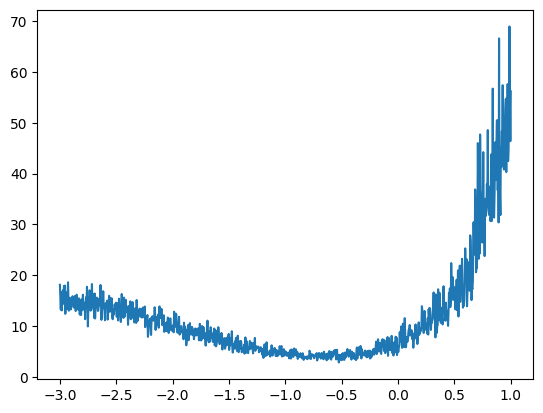

In [ ]:
plt.plot(lri,lossi);

Loss is minimum at lr being around 10**(-1) = 0.1

In [ ]:
#Set initial lr =0.1 from previous graph

stepi = []
lossi = []
n=0

for i in range(1000):

  n+=1 # counting steps

  #batch size of 32
  ix = torch.randint(0,xs.shape[0],(32,))

  #forward pass on batch
  xenc = C[ix].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,ys[ix])
  lossi.append(loss.item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

4.471351623535156


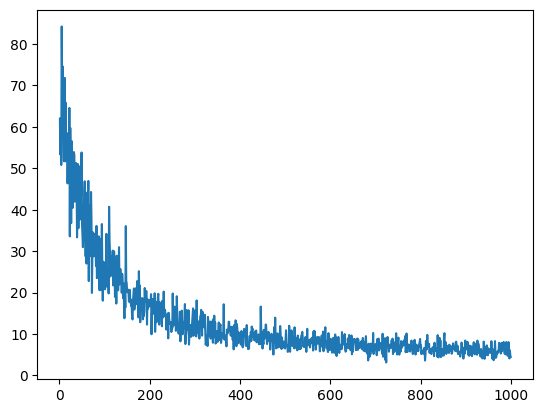

In [ ]:
plt.plot(stepi,lossi)

***Noise is visible in loss curve, so increasing batch size can help***

In [ ]:
# Re-initializing all parameters

C = torch.randn((27,2))
C = C[xs]

W1 = torch.randn((6,100))
b1 = torch.randn(100)

W2 = torch.randn((100,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
#Set initial lr =0.1 from previous graph

stepi = []
lossi = []
n=0

for i in range(1000):

  n+=1 # counting steps

  #batch size of 100
  ix = torch.randint(0,xs.shape[0],(100,))

  #forward pass on batch
  xenc = C[ix].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,ys[ix])
  lossi.append(loss.item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

3.452073574066162


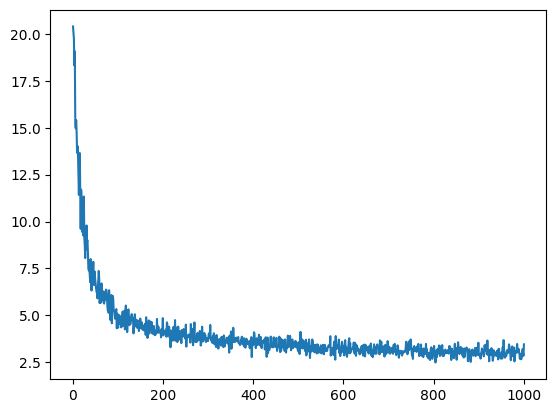

In [ ]:
plt.plot(stepi,lossi) ## final iterations

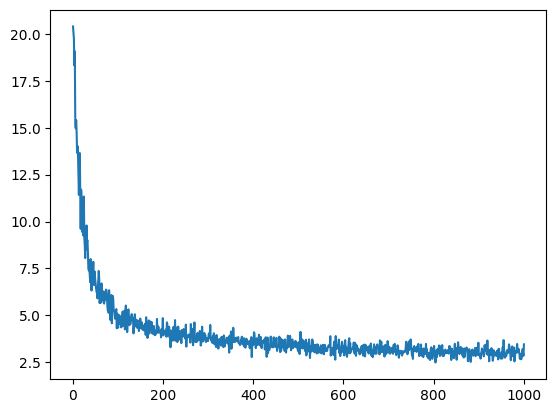

In [ ]:
plt.plot(stepi,lossi) ### initial iterations

In [ ]:
#Checking loss over entire dataset
xenc = C.view(-1,6)
h = torch.tanh(xenc@ W1 + b1)
logits = h@W2 + b2
outs = F.softmax(logits,1)
loss = F.cross_entropy(logits,ys)
print(loss)

tensor(2.9731, grad_fn=<NllLossBackward0>)


***Re-initialization, new batch size, Learning rate decay towards the end implemented***

In [ ]:
# Re-initializing all parameters

C = torch.randn((27,2))
C = C[xs]

W1 = torch.randn((6,100))
b1 = torch.randn(100)

W2 = torch.randn((100,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
#Set initial lr =0.1 from previous graph

stepi = []
lossi = []
n=0

for i in range(20000):

  n+=1 # counting steps

  #batch size of 100
  ix = torch.randint(0,xs.shape[0],(100,))

  #forward pass on batch
  xenc = C[ix].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,ys[ix])
  lossi.append(loss.item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  lr = 0.1 if i < 100000 else 0.01 #Learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())



2.2665929794311523


In [ ]:
#Checking loss over entire dataset
xenc = C.view(-1,6)
h = torch.tanh(xenc@ W1 + b1)
logits = h@W2 + b2
outs = F.softmax(logits,1)
loss = F.cross_entropy(logits,ys)
print(loss)

tensor(2.2971, grad_fn=<NllLossBackward0>)


***Loss on dataset keeps on decreasing. Maybe a sign of overfitting. Hence, data is split into Train, Test, Val parts to analyze further***

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  xs, ys = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      xs.append(context)
      ys.append(ix)
      context = context[1:] + [ix] # crop and append

  xs = torch.tensor(xs)
  ys = torch.tensor(ys)
  print(xs.shape, ys.shape)
  return xs, ys

import random
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182708, 3]) torch.Size([182708])
torch.Size([22783, 3]) torch.Size([22783])
torch.Size([22655, 3]) torch.Size([22655])


In [ ]:
# Re-initializing all parameters

C = torch.randn((27,2))

W1 = torch.randn((6,100))
b1 = torch.randn(100)

W2 = torch.randn((100,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
#Set initial lr =0.1 from previous graph and train on training set

stepi = []
lossi = []
n=0

for i in range(20000):

  n+=1 # counting steps

  #batch size of 100
  ix = torch.randint(0,Xtr.shape[0],(100,))

  #forward pass on batch
  xenc = C[Xtr[ix]].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,Ytr[ix])
  lossi.append(loss.item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  lr = 0.1 if i < 100000 else 0.01 #Learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())



2.425476312637329


In [ ]:
#Checking loss over dev set
xenc = C[Xdev].view(-1,6)
h = torch.tanh(xenc@ W1 + b1)
logits = h@W2 + b2
outs = F.softmax(logits,1)
loss = F.cross_entropy(logits,Ydev)
print(loss)

tensor(2.3240, grad_fn=<NllLossBackward0>)


**The training loss and dev loss are almost equal so we maybe underfitting. So, let's make network bigger. Things to change can be larger hidden layer, larger dimension for embedding.**

***First, hidden layer is made larger, then, embeddings are visualized in 2D***

In [ ]:
# Re-initializing all parameters

C = torch.randn((27,2))

W1 = torch.randn((6,300))
b1 = torch.randn(300)

W2 = torch.randn((300,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
#Set initial lr =0.1 from previous graph and train on training set

stepi = []
lossi = []
n=0

for i in range(20000):

  n+=1 # counting steps

  #batch size of 100
  ix = torch.randint(0,Xtr.shape[0],(100,))

  #forward pass on batch
  xenc = C[Xtr[ix]].view(-1,6)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,Ytr[ix])
  lossi.append(loss.item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  #lr = 0.1 if i < 100000 else 0.01 #Learning rate decay
  for p in parameters:
    p.data += -0.001 * p.grad

print(loss.item())

2.2528162002563477


In [ ]:
#Checking loss over dev set
xenc = C[Xdev].view(-1,6)
h = torch.tanh(xenc@ W1 + b1)
logits = h@W2 + b2
outs = F.softmax(logits,1)
loss = F.cross_entropy(logits,Ydev)
print(loss)

tensor(2.3176, grad_fn=<NllLossBackward0>)


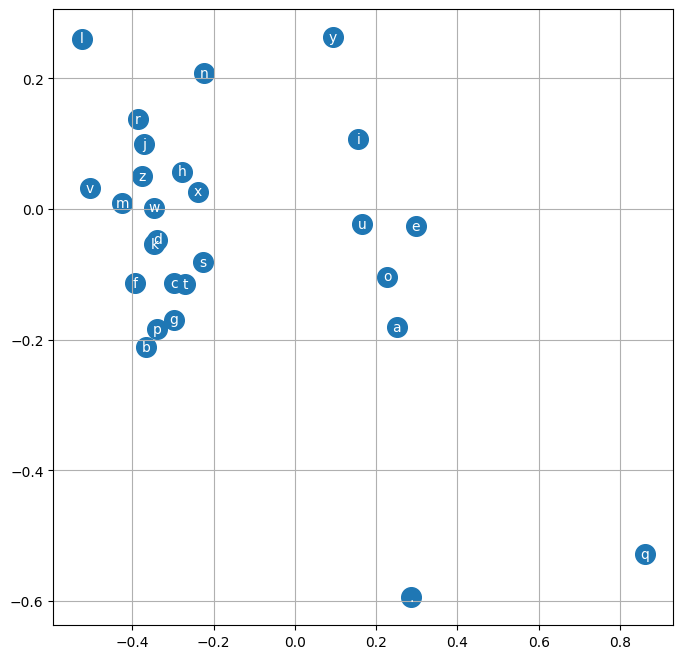

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

***Time to make bigger embeddings now***

In [ ]:
# Re-initializing all parameters

C = torch.randn((27,10))

W1 = torch.randn((30,300))
b1 = torch.randn(300)

W2 = torch.randn((300,27))
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
stepi = []
lossi = []
n=0

In [ ]:
#Set initial lr =0.1 from previous graph and train on training set



for i in range(1000):

  n+=1 # counting steps

  #batch size of 100
  ix = torch.randint(0,Xtr.shape[0],(50,))

  #forward pass on batch
  xenc = C[Xtr[ix]].view(-1,30)
  h = torch.tanh(xenc@ W1 + b1)
  logits = h@W2 + b2
  outs = F.softmax(logits,1)
  loss = F.cross_entropy(logits,Ytr[ix])
  lossi.append(loss.log10().item())
  stepi.append(n)


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update gradients
  #lr = 0.1 if i < 350000 else 0.01 #Learning rate decay
  for p in parameters:
    p.data += -0.0001 * p.grad

print(loss.item())

1.903107762336731


In [ ]:
#Checking loss over dev set
xenc = C[Xdev].view(-1,30)
h = torch.tanh(xenc@ W1 + b1)
logits = h@W2 + b2
outs = F.softmax(logits,1)
loss = F.cross_entropy(logits,Ydev)
print(loss)

tensor(2.1980, grad_fn=<NllLossBackward0>)


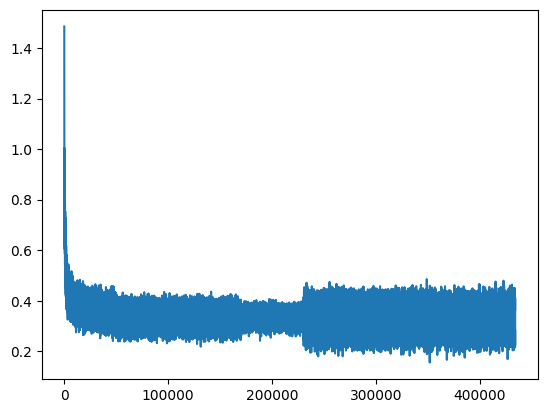

In [ ]:
plt.plot(stepi,lossi)

## Not careful with the intialization of the network.
# (1) What is the loss if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve?
# (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?


In [ ]:
## loss for uniform probs at out layer initially

uni = torch.ones(27)/27
logits = uni.exp()
loss = 0.0
n=0.0
for i in range(ys.shape[0]):
  n +=1
  loss += F.cross_entropy(logits,ys[i])
print(loss/n)

tensor(3.2960)


**Hence, initial loss must be around 3.29**

In [ ]:
### Weights and biases initialization

C = torch.randn((27,10))/(300**0.5)

W1 = torch.randn((30,300))
b1 = torch.randn(300)

W2 = torch.randn((300,27))/(27**0.5)
b2 = torch.randn(27)

parameters = [C, W1,b1, W2,b2]
for p in parameters:
  p.requires_grad = True


In [ ]:
for i in range(10000):

  #indexing for a batch of size 32
  ix = torch.randint(0,xs.shape[0],(50,))

  #forward pass on batch
  xenc = C[xs[ix]].view(-1,30) # concatenating for first input layer
  h = torch.tanh(xenc@W1 + b1)
  logits = h@W2 + b2
  loss = F.cross_entropy(logits,ys[ix])  # cross entropy loss
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  #update

  for p in parameters:
    p.data += -0.0001 * p.grad #learning rate = 0.1

print(loss.item())

Streaming output truncated to the last 5000 lines.
2.1138505935668945
2.731015682220459
2.1607303619384766
2.2022485733032227
2.1953437328338623
2.076420545578003
2.2710955142974854
2.165956735610962
1.8772528171539307
2.3926258087158203
2.180992841720581
1.9398390054702759
2.2386786937713623
1.9127284288406372
2.095651149749756
2.0380334854125977
2.082157850265503
2.1960160732269287
2.2704906463623047
2.180386543273926
2.1211729049682617
1.9976601600646973
2.1752350330352783
2.039016008377075
2.4110589027404785
2.387255907058716
2.003527879714966
1.866361379623413
2.0571510791778564
2.086566209793091
2.140152931213379
2.158930778503418
2.438485622406006
2.244288206100464
2.2686967849731445
2.1606521606445312
2.4405744075775146
2.0240626335144043
2.126037120819092
2.197953701019287
2.486532688140869
2.385596990585327
2.367654800415039
2.1191766262054443
1.9338375329971313
2.1530981063842773
1.8872437477111816
2.214406967163086
2.1360156536102295
2.161491632461548
2.1028382778167725
2.0

Followed a little trick about initialization from [Neural Networks and Deeo Learning online book](http://neuralnetworksanddeeplearning.com/)

In [ ]:
for _ in range(10):
  context = [0] * 3
  out = []
  while True:
    xenc = C[torch.tensor(context)].view(-1,30)
    h = torch.tanh(xenc@W1 + b1)
    logits = h@ W2 + b2
    probs = F.softmax(logits,1)
    ix = torch.multinomial(probs, num_samples=1).item()
    out.append(itos[ix])
    if ix ==0:
      break
    context = context[1:] + [ix]
  print(''.join(out))


kia.
nosia.
jadra.
onnis.
dressyirelim.
kaysindelr.
chaily.
cardegfea.
marqua.
noatsa.


## MLP glorified with batch normalization, careful initializations

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
# MLP revisited
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)  #* 0.2
#b1 = torch.randn(n_hidden,                        generator=g)  * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g)  * 0.01
b2 = torch.randn(vocab_size,                      generator=g)  #* 0

bnbias = torch.zeros((1,n_hidden))
bngain = torch.ones((1,n_hidden))

bnmean_running = torch.zeros((1,n_hidden))
bnstd_running = torch.ones((1,n_hidden))


parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

12097


In [ ]:
emb = C[Xb] # embed the characters into vectors
embcat = emb.view(emb.shape[0], -1)
s = embcat @ W1
smeani = s.mean(0, keepdim = True)
sstdi = s.std(0, keepdim = True)
a = (s -smeani)/sstdi
a.std()

tensor(0.9843, grad_fn=<StdBackward0>)

In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  # Linear layer
  hpreact = embcat @ W1 #+ b1 # hidden layer pre-activation
  bnmeani = hpreact.mean(0, keepdim = True)
  bnstdi = hpreact.std(0, keepdim = True)
  hpreact = bngain * (hpreact - bnmeani)/bnstdi + bnbias

  with torch.no_grad():
    bnmean_running = 0.999* bnmean_running + 0.001* bnmeani
    bnstd_running = 0.999*bnstd_running + 0.001*bnstdi
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  #break

      0/ 200000: 3.8443


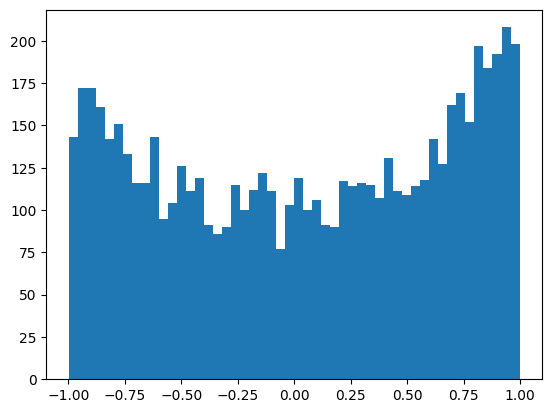

In [ ]:
plt.hist(h.view(-1).tolist(), bins =50);

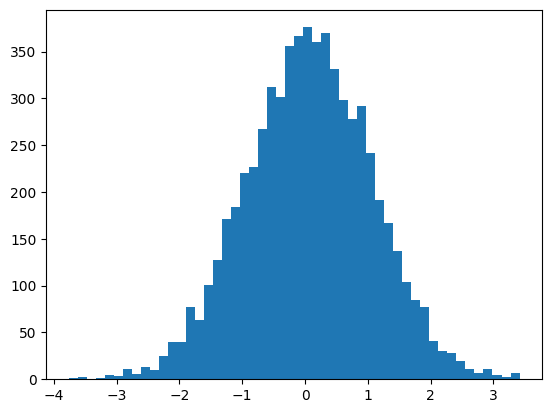

In [ ]:
plt.hist(hpreact.view(-1).tolist(), bins =50);

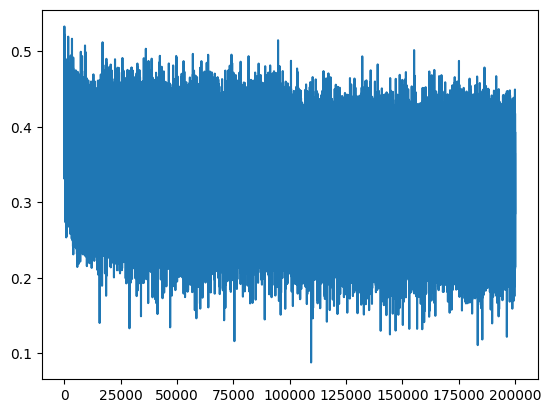

In [ ]:
plt.plot(lossi)

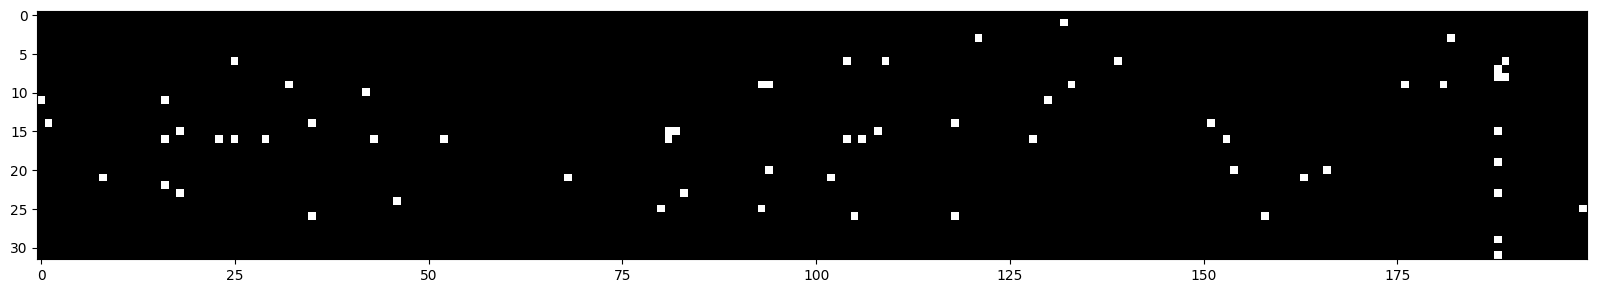

In [ ]:
plt.figure(figsize = (20,10))
plt.imshow(h.abs()>0.99,  cmap = 'gray',interpolation = 'nearest')

In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  #+ b1
  hpreact = bngain * (hpreact - bnmean_running)/bnstd_running + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0624213218688965
val 2.1032140254974365


In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      emb = C[torch.tensor([context])] # (1,block_size,n_embd)
      h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1 )# concatenate the vectors
      logits = h @W2 + b2
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out)) # decode and print the generated word

mora.
mayah.
seel.
ndyn.
alerethruthadrie.
cadelyn.
elin.
shi.
jen.
eden.
est.
aarvelyzion.
kamin.
shub.
roshimies.
kin.
renlynn.
novana.
ubeen.
der.


### PREVIOSULY IN NEURAl NETS

Importing all the neessary libraries.
  - Pytorch
  - Matplotlib
  - Random

In [ ]:
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-10-24 13:17:41--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.1s    

2023-10-24 13:17:42 (1.86 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
#bring dataset here

words = open('names.txt','r').read().splitlines()
# Let us look at the number of words we have in our dataset and some samples of data
print('Number of name-like words used for training: ',len(words))
print(words[:5])
# to work with data, we need to convert it into numbers
letter = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(letter)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(letter)+1
print('vocab_size: ', vocab_size)

Number of name-like words used for training:  32033
['emma', 'olivia', 'ava', 'isabella', 'sophia']
vocab_size:  27


# Neural nets are trained on data. The data we have are words. The task is to generate more name-like words given a lot of names as training data.

# This is done by splitting each word into individual letters and training neural net to predict the next letter given the previous 'l' number of letters.

# During the implementation, we take the trained neural net and feed it initial 'l' letters. The task of network is to predict the next letter. This predicted letter is again fed back to the network till it says the word has ended.

# The hope is that this word formed by the trained neural net sounds like a name, since the training is done by words all sounding like a name.

In [ ]:
#got data here, now prepare it for analysis.
#each word is split into individual letters. First 'l' number of letters are combined to form an input string.
#The next letter is labeled the output.

block_size = 3

xs = [] #input data
ys = [] #output data or labels

# eg:
#     word = 'ram'                              # A block_size ('l') is chosen as context to input neural net. Initially, a string of
#     modified_name = 'ram' + '.' = 'ram.'      #     dots of length 'l' is prepared. The first letter of the word is considered the
#     input1,output1 = ['...'],['r']            #     output string. Next, First letter of word is appended to the dots.The leftmost
#     input2,output2 = ['..r'],['a']            #     string is dropped, making a new string of size block_size. The second letter of
#     input3,output3 = ['.ra'],['m']            #     the word is now the output. This process is continued till all the letters of
#     input4,output4 = ['ram'],['.']            #     the word are exhausted. This completes out data preparation.

random.shuffle(words)
for word in words:
  word = word + '.'
  context = [0] * block_size  #'l'
  for letters in list(word):
    xs.append(context)
    ys.append(stoi[letters])
    context = context[1:] + [stoi[letters]]

# printing a few input, output data pairs

for word in words[:3]:
  word = word + '.'
  context = [0] * block_size  #'l'
  print(word)
  for letters in list(word):
    xs.append(context)
    q = [itos[context[i]] for i in range(len(context))]
    q = ''.join(q)
    print([q],'--->', [letters])
    ys.append(stoi[letters])
    context = context[1:] + [stoi[letters]]


eevee.
['...'] ---> ['e']
['..e'] ---> ['e']
['.ee'] ---> ['v']
['eev'] ---> ['e']
['eve'] ---> ['e']
['vee'] ---> ['.']
daizy.
['...'] ---> ['d']
['..d'] ---> ['a']
['.da'] ---> ['i']
['dai'] ---> ['z']
['aiz'] ---> ['y']
['izy'] ---> ['.']
gizella.
['...'] ---> ['g']
['..g'] ---> ['i']
['.gi'] ---> ['z']
['giz'] ---> ['e']
['ize'] ---> ['l']
['zel'] ---> ['l']
['ell'] ---> ['a']
['lla'] ---> ['.']


In [ ]:
# Let us look at the size of the prepared dataset now. This is referred to as data from now on.
print('Size of input data: ',len(xs))
print('Size of output data: ',len(ys))

Size of input data:  228166
Size of output data:  228166


In [ ]:
# Data is now split into a training set, validation set and a test set.
# The first 80% us taken as training set, next 10% as validation set and the rest as test set.

Xtr = torch.tensor(xs[0:int(0.8*len(xs))])
Ytr = torch.tensor(ys[0:int(0.8*len(xs))])

Xval = torch.tensor(xs[int(0.8*len(xs)):int(0.9*len(xs))])
Yval = torch.tensor(ys[int(0.8*len(xs)):int(0.9*len(xs))])

Xtest = torch.tensor(xs[int(0.9*len(xs)):int(len(xs))])
Ytest = torch.tensor(ys[int(0.9*len(xs)):int(len(xs))])

# Checking the sizes of train, val and test sets
print('Size of training set: ', len(Xtr))
print('Size of validation set: ', len(Xval))
print('Size of test set: ', len(Xtest))


Size of training set:  182532
Size of validation set:  22817
Size of test set:  22817


Some references used for implementation:
  - [Bengio et al. 2003 MLP paper; Title: A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
  - [Andrej Karpathy's YouTube playlist](https://youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&si=vzau20q6B5Yr_d-A)
  - [Batch Normalization](https://arxiv.org/abs/1502.03167#)



In [ ]:
# Now, everything is ready, let's implement.

# We are bulding a neural network now that has multiple layers. Each layer is explained paralelly with implementation.

class Linear:

  def __init__(self, n_in, n_out):
    self.weights = torch.randn((n_in,n_out))      # n_in is the number of neurons in the previous layer.
    self.bias = torch.randn(n_out)                # n_out is the number of neurons in the current layer.

  def __call__(self,x):
    self.out = x @ self.weights + self.bias       # Layer performs a linear operation when it's called.
    return self.out

  def parameters(self):
    return [self.weights, self.bias]              # Returns the parameters to keep track of for backpropagation.


class Tanh:

  def __call__(self,x):
    self.out = torch.tanh(x)                      # Simply performs tanh() function on the activations or 'x's
    return self.out

  def parameters(self):
    return []


class BatchNorm1d:                                          # Batch Normalization normalizes each layer's activations before
                                                            #     passed on to the non-linearity. This helps in reducing
  def __init__(self, dim, eps=1e-5, momentum=0.1):          #     internal covariance shift. Parameters beta and gamma are
    self.eps = eps                                          #     intorduced to accommodate for the identity transformation
    self.momentum = momentum                                #     of the activations. More on this can be learnt from the
    self.training = True                                    #     above research paper.
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0,keepdim = True)
      xvar = x.var(0,keepdim = True)
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]



class Embedding:

  def __init__(self, vocab_size, n_embd, block_size):    #          Each of the strings in context belongs to the vocabulary. The idea is
    self.weights = torch.randn((vocab_size,n_embd))     #                to map all the words in the vocabulary into a smaller dimensional
    self.block_size = block_size                        #                vector space that has dimensions: n_embd. We call this process
  def __call__(self, x):                                #                Embedding. So, a look up table is created initially to embed all
    self.out = self.weights[x].view(-1, n_embd * self.block_size)
    return self.out                                     #                words in vocabulary. This table says where each word goes in embedding
                                                        #                space. The look up table is then learned during training.

  def parameters(self):                            # Instead of passing one string at a time as input, block size of strings
    return [self.weights]                          #      are passed at once. Hence the concatenation. Refer to the above paper
                                                   #      for more details.

class Sequential:
  # A class to put it all together.
  def __init__(self, layers):
    self.layers = layers

  def __call__(self,x):
    for layer in self.layers:
      x = layer(x)

    self.out = x
    return self.out

  def parameters(self):
    self.parameters = [p for layer in self.layers for p in layer.parameters()]
    for p in self.parameters:
      p.requires_grad = True
    return self.parameters






In [ ]:
n_embd = 10       # Letters are embedded into a 10- dimensional space
n_hidden = 200    # 200 neuron hidden layer is used
block_size = 3    # Previous three letters are used to predict the next letter
model = Sequential([
    Embedding(vocab_size, n_embd, block_size),
    Linear(block_size*n_embd, n_hidden), BatchNorm1d(n_hidden),    Tanh(),
    Linear(n_hidden, n_hidden),          BatchNorm1d(n_hidden),    Tanh(),
    Linear(n_hidden, vocab_size)
])
parameters = model.parameters()

In [ ]:
max_steps = 200000
lossi = []      # keeping track of loss as the training progresses.

# parameter init
with torch.no_grad():
  model.layers[-1].weights *= 0.1 # last layer make less confident

for i in range(max_steps):
  # Randomly sampling 32 examples to create a training mini batch
  ix = torch.randint(0,Xtr.shape[0],(32,))
  #feed forward
  logits = model(Xtr[ix])
  loss = F.cross_entropy(logits, Ytr[ix])

  #backprop
  for p in parameters:
    p.grad = None

  loss.backward()     # Magic step

  lr = 0.1 if i<100000 else 0.01

  for p in parameters:
    p.data += -lr * p.grad

    # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  # break

      0/ 200000: 3.7959
  10000/ 200000: 2.4681
  20000/ 200000: 2.7644
  30000/ 200000: 1.9641
  40000/ 200000: 2.1747
  50000/ 200000: 2.0906
  60000/ 200000: 2.1844
  70000/ 200000: 2.3510
  80000/ 200000: 2.0517
  90000/ 200000: 2.2024
 100000/ 200000: 2.0715
 110000/ 200000: 2.2189
 120000/ 200000: 2.3547
 130000/ 200000: 2.1291
 140000/ 200000: 1.7576
 150000/ 200000: 1.9990
 160000/ 200000: 2.0661
 170000/ 200000: 1.5895
 180000/ 200000: 2.1739
 190000/ 200000: 2.2882


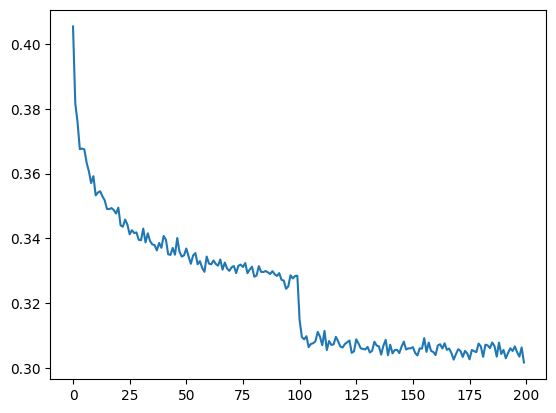

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))    #PLotting loss

sudden dip can be seen at the change in learning rate

In [ ]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
  layer.training = False

In [ ]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xval, Yval),
    'test': (Xtest, Ytest),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0307421684265137
val 2.108201026916504


In [ ]:
split_loss('test')

test 2.108120918273926


### Performance Log:
    
    - Original (3 character context + 100 hidden neurons):
        loss : 2.82
    - 3 letter block size,2d embeddings, 300 hidden neurons per layer, learning rate training
        train : 2.25, dev : 2.31
    - 10 Embeddings, 3 letter block size, 300 hidden neurons per layer
        dev loss : 2.198
        Some more tuning of initial weights, loss achieved as low as 2.05
    - Batch Norm implemented.
        train : 2.06
        dev : 2.103
    - Final go with all glory
        train : 2.03
        dev : 2.108

    ---- Final Test loss : 2.108120918273926 ⛳ ----


In [ ]:
# sample from the model
for _ in range(10):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out)) # decode and print the generated word

leo.
temon.
zylan.
rif.
kayla.
milliah.
cari.
telyn.
ayuma.
havo.
